In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
df = pd.read_csv('Phishing_Email.csv',delimiter=',',encoding='latin-1')
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18634 non-null  object
 1   Email Type  18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB


In [6]:
print(df.isna().sum())
print(df.duplicated().sum())

Email Text    16
Email Type     0
dtype: int64
1111


In [7]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of ham and spam messages')

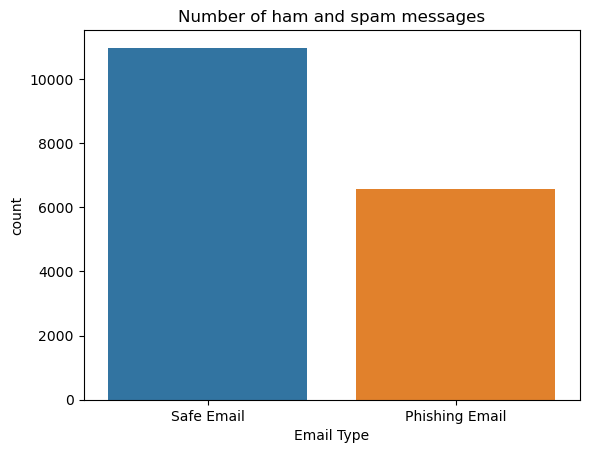

In [8]:
sns.countplot(df['Email Type'])
plt.xlabel('Email Type')
plt.title('Number of ham and spam messages')

In [9]:
x = df['Email Text']
y = df['Email Type']

le = LabelEncoder()

y = le.fit_transform(y)
y = y.reshape(-1,1)

In [10]:
#Split into training and test data.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 500

tok = Tokenizer(num_words=max_words)

#Process the train set data
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

#Process the test set data.
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [15]:
sequences_matrix

array([[   0,    0,    0, ...,    2, 1833, 4314],
       [   0,    0,    0, ...,  232,  328, 1508],
       [   0,    0,    0, ...,   31, 4644,  479],
       ...,
       [   0,    0,    0, ...,  553, 1302, 2021],
       [   0,    0,    0, ...,   63, 8957,   88],
       [   0,    0,    0, ..., 1998,   35,   31]])

In [16]:
sequences_matrix.shape


(14030, 500)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D

model = Sequential()

# Add an Embedding layer 
model.add(Embedding(10000, 32))

# Add a Convolution1D layer 
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Add a LSTM layer 
model.add(LSTM(100))

# Output layer with a single neuron and a sigmoid activation function, as this is a binary classification problem
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
________________________________________________

In [25]:
history = model.fit(sequences_matrix, y_train, epochs=20, batch_size=128,  validation_data=(test_sequences_matrix, y_test))


Epoch 1/20
110/110 [==============================] - 42s 357ms/step - loss: 0.3967 - accuracy: 0.8086 - val_loss: 0.1174 - val_accuracy: 0.9658
Epoch 2/20
110/110 [==============================] - 43s 395ms/step - loss: 0.0673 - accuracy: 0.9785 - val_loss: 0.0660 - val_accuracy: 0.9803
Epoch 3/20
110/110 [==============================] - 44s 401ms/step - loss: 0.0285 - accuracy: 0.9924 - val_loss: 0.0633 - val_accuracy: 0.9818
Epoch 4/20
110/110 [==============================] - 46s 422ms/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 0.0818 - val_accuracy: 0.9766
Epoch 5/20
110/110 [==============================] - 47s 427ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.0796 - val_accuracy: 0.9778
Epoch 6/20
110/110 [==============================] - 49s 445ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.1000 - val_accuracy: 0.9738
Epoch 7/20
110/110 [==============================] - 48s 432ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.1184 - val_ac

In [26]:
loss, accuracy = model.evaluate(test_sequences_matrix, y_test)
print(f"Model Loss: {loss}\nModel Accuracy: {accuracy*100}")

110/110 [==============================] - 6s 57ms/step - loss: 0.1281 - accuracy: 0.9783
Model Loss: 0.12811428308486938
Model Accuracy: 97.83352613449097


Text(0, 0.5, 'Loss')

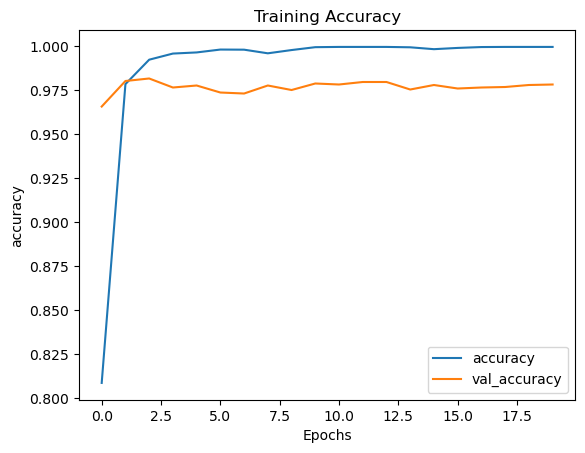

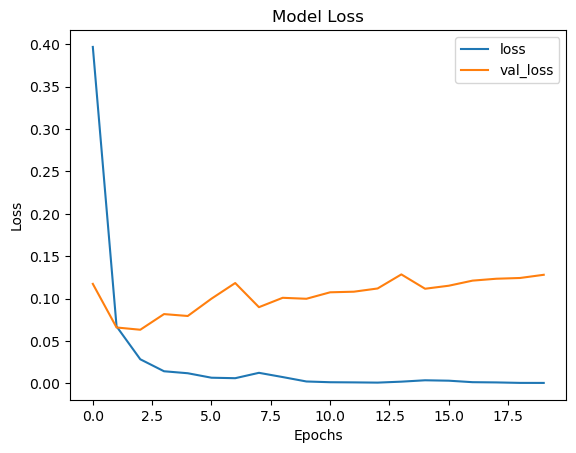

In [27]:
pd.DataFrame(history.history)

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [28]:
y_pred_prob = model.predict(test_sequences_matrix)
y_pred = (y_pred_prob > 0.5).astype(int)

110/110 [==============================] - 6s 54ms/step


In [29]:
# classification report
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1259
           1       0.98      0.98      0.98      2249

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



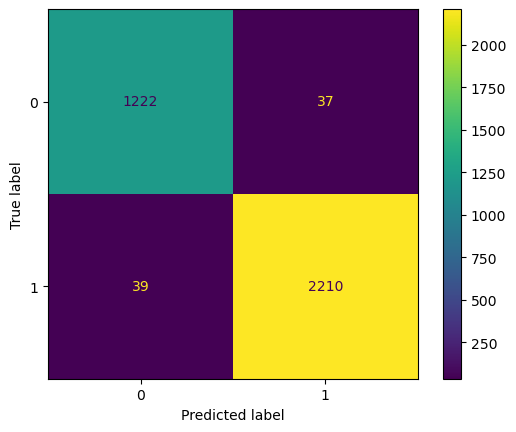

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)

# plot the confusion matrix
cm_display.plot()
plt.show()

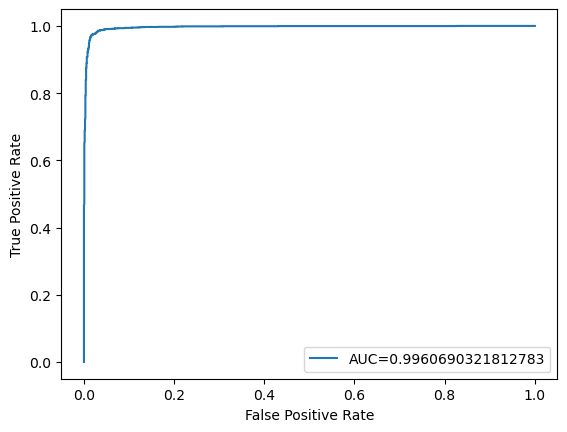

In [31]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [32]:
model.save("cnn-lstm_phishing_emails_data.h5")